# Getting Data

In [4]:
import pandas as pd

from Classification.task14_mpg01 import Data

data = pd.read_csv('Data/train.csv')
data.drop('id', axis=1, inplace=True)
X,y = data.drop('diagnosed_diabetes', axis=1), data['diagnosed_diabetes']

data

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0


# Feature Engineering


In [24]:
new_data = data.copy()

new_data = pd.get_dummies(new_data, dtype=int)
new_data

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Current,smoking_status_Former,smoking_status_Never,employment_status_Employed,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,1,0,0,1,0,0,1,0,0,0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,0,0,1,0,0,1,1,0,0,0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,1,0,0,0,0,1,0,1,0,0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,1,0,0,1,0,0,1,0,0,0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,...,0,0,1,0,1,0,1,0,0,0
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,...,0,0,1,0,1,0,1,0,0,0
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,...,0,1,0,0,0,1,1,0,0,0
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,...,1,0,0,0,0,1,0,1,0,0


# Data Metric and visualisation

## Correlation Matrix

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_mtx(data, annot:bool = True, size:int = (20,20)):
    names = new_data.columns
    df_features = pd.DataFrame(new_data, columns=names)

    corr_mtx = df_features.corr(method='pearson')


    plt.figure(figsize=(20, 20))
    # 'annot=True' prints the values; 'fmt=".2f"' rounds to 2 decimal places
    sns.heatmap(corr_mtx, annot=False, fmt=".2f", cmap="RdBu_r", xticklabels=names, yticklabels=names)
    plt.show()

    return corr_mtx

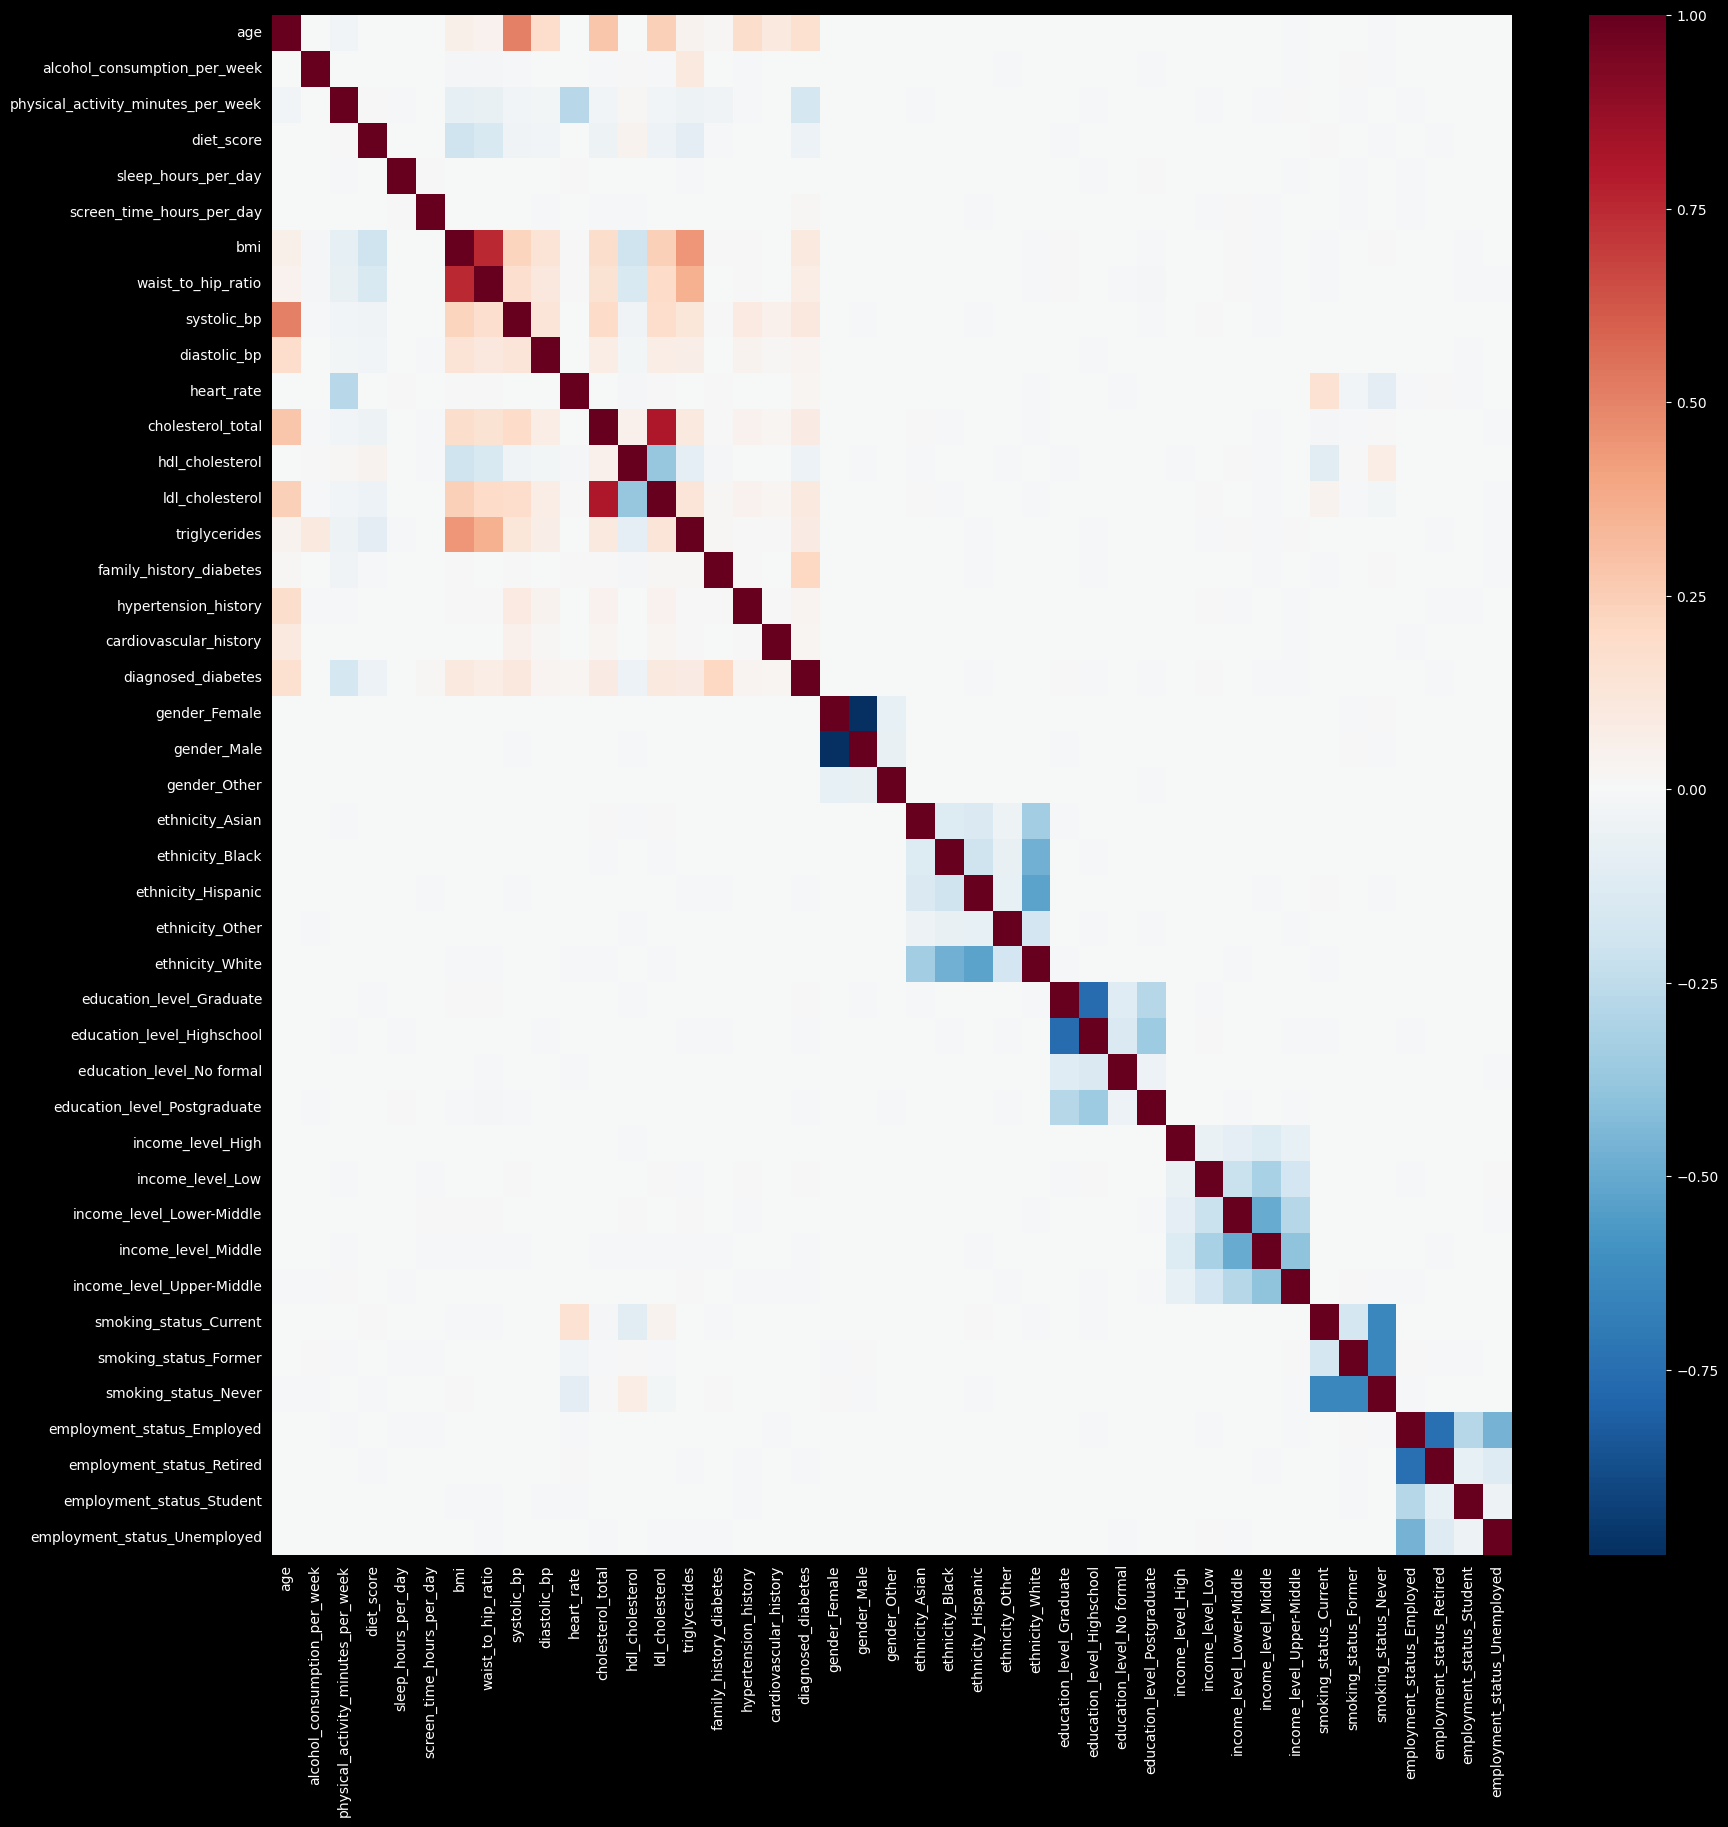

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Current,smoking_status_Former,smoking_status_Never,employment_status_Employed,employment_status_Retired,employment_status_Student,employment_status_Unemployed
age,1.000000,0.003295,-0.029101,-0.001898,-0.001286,-0.002313,0.062958,0.044654,0.502894,0.188403,...,0.000413,0.000178,-0.004668,0.002778,0.001404,-0.003252,0.002964,-0.002097,0.000568,-0.002396
alcohol_consumption_per_week,0.003295,1.000000,0.003010,0.003284,-0.000351,0.004797,-0.017552,-0.014716,-0.006472,-0.001502,...,-0.000149,0.004919,-0.003096,0.002664,0.009856,-0.009716,-0.001423,-0.001646,0.002889,0.003022
physical_activity_minutes_per_week,-0.029101,0.003010,1.000000,0.008466,-0.006900,0.001754,-0.085086,-0.067508,-0.030908,-0.018341,...,0.002169,-0.003984,0.005711,-0.000046,-0.003593,0.002822,-0.002781,-0.000309,0.002961,0.003370
diet_score,-0.001898,0.003284,0.008466,1.000000,0.000882,0.000382,-0.198899,-0.150906,-0.038676,-0.028384,...,-0.001772,0.002569,-0.001979,0.009965,0.002791,-0.009926,0.002212,-0.003056,0.002467,-0.000902
sleep_hours_per_day,-0.001286,-0.000351,-0.006900,0.000882,1.000000,0.005965,0.003380,0.000371,0.003995,0.001457,...,-0.002325,0.003569,-0.004584,0.001731,-0.004486,0.002130,-0.003341,0.001440,-0.000536,0.003971
screen_time_hours_per_day,-0.002313,0.004797,0.001754,0.000382,0.005965,1.000000,0.002758,0.003393,0.004276,-0.004632,...,0.005760,-0.004534,0.003980,0.002812,-0.003354,0.000410,-0.005081,0.004845,0.001769,0.000599
bmi,0.062958,-0.017552,-0.085086,-0.198899,0.003380,0.002758,1.000000,0.757191,0.225033,0.143702,...,0.006610,-0.005057,-0.001422,-0.009977,0.003067,0.005394,0.000850,0.001328,-0.002841,-0.001610
waist_to_hip_ratio,0.044654,-0.014716,-0.067508,-0.150906,0.000371,0.003393,0.757191,1.000000,0.171691,0.111056,...,0.009051,-0.006503,-0.000744,-0.006851,0.001585,0.004108,0.002048,0.001401,-0.002719,-0.003844
systolic_bp,0.502894,-0.006472,-0.030908,-0.038676,0.003995,0.004276,0.225033,0.171691,1.000000,0.132916,...,0.001361,-0.003920,-0.002196,-0.001350,-0.002230,0.002780,0.000680,-0.000490,-0.001334,0.000372
diastolic_bp,0.188403,-0.001502,-0.018341,-0.028384,0.001457,-0.004632,0.143702,0.111056,0.132916,1.000000,...,0.002244,-0.000461,0.000480,0.000144,-0.002009,0.001446,0.000665,-0.000892,-0.002800,0.001890


In [44]:
corr_mtx(data, False)

#